In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data0=pd.read_csv('../../data/001/high_diamond_ranked_10min.csv')
data0.shape

(9879, 40)

In [3]:
data0.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
target=data0['blueWins']
data0.drop(['gameId','blueWins'],axis=1,inplace=True)

In [5]:
data0.isnull().sum().sum()

0

In [6]:
corr_mat=data0.corr()
corr_mat

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWardsPlaced,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,0.178540,-0.156764,-0.455139,-0.471754,-0.144104,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,0.039750,0.186413,0.160683,0.179083,0.086686,0.159595,0.233875,0.211496,0.086686,0.186413,-0.027102,-0.023049,-0.134309,-0.188852,0.170436,-0.162406,-0.506546,-0.631930,-0.016827,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871
blueHeralds,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,0.217901,0.153974,0.128201,0.152386,0.083509,0.121291,0.162943,0.162496,0.083509,0.153974,0.005653,0.019885,-0.077509,-0.095527,0.076195,-0.051209,-0.105593,0.022035,-0.210012,-0.042872,-0.109557,-0.087337,-0.107718,-0.046253,-0.019622,-0.162943,-0.162496,-0.046253,-0.109557
blueTowersDestroyed,0.009462,-0.0091

<Axes: >

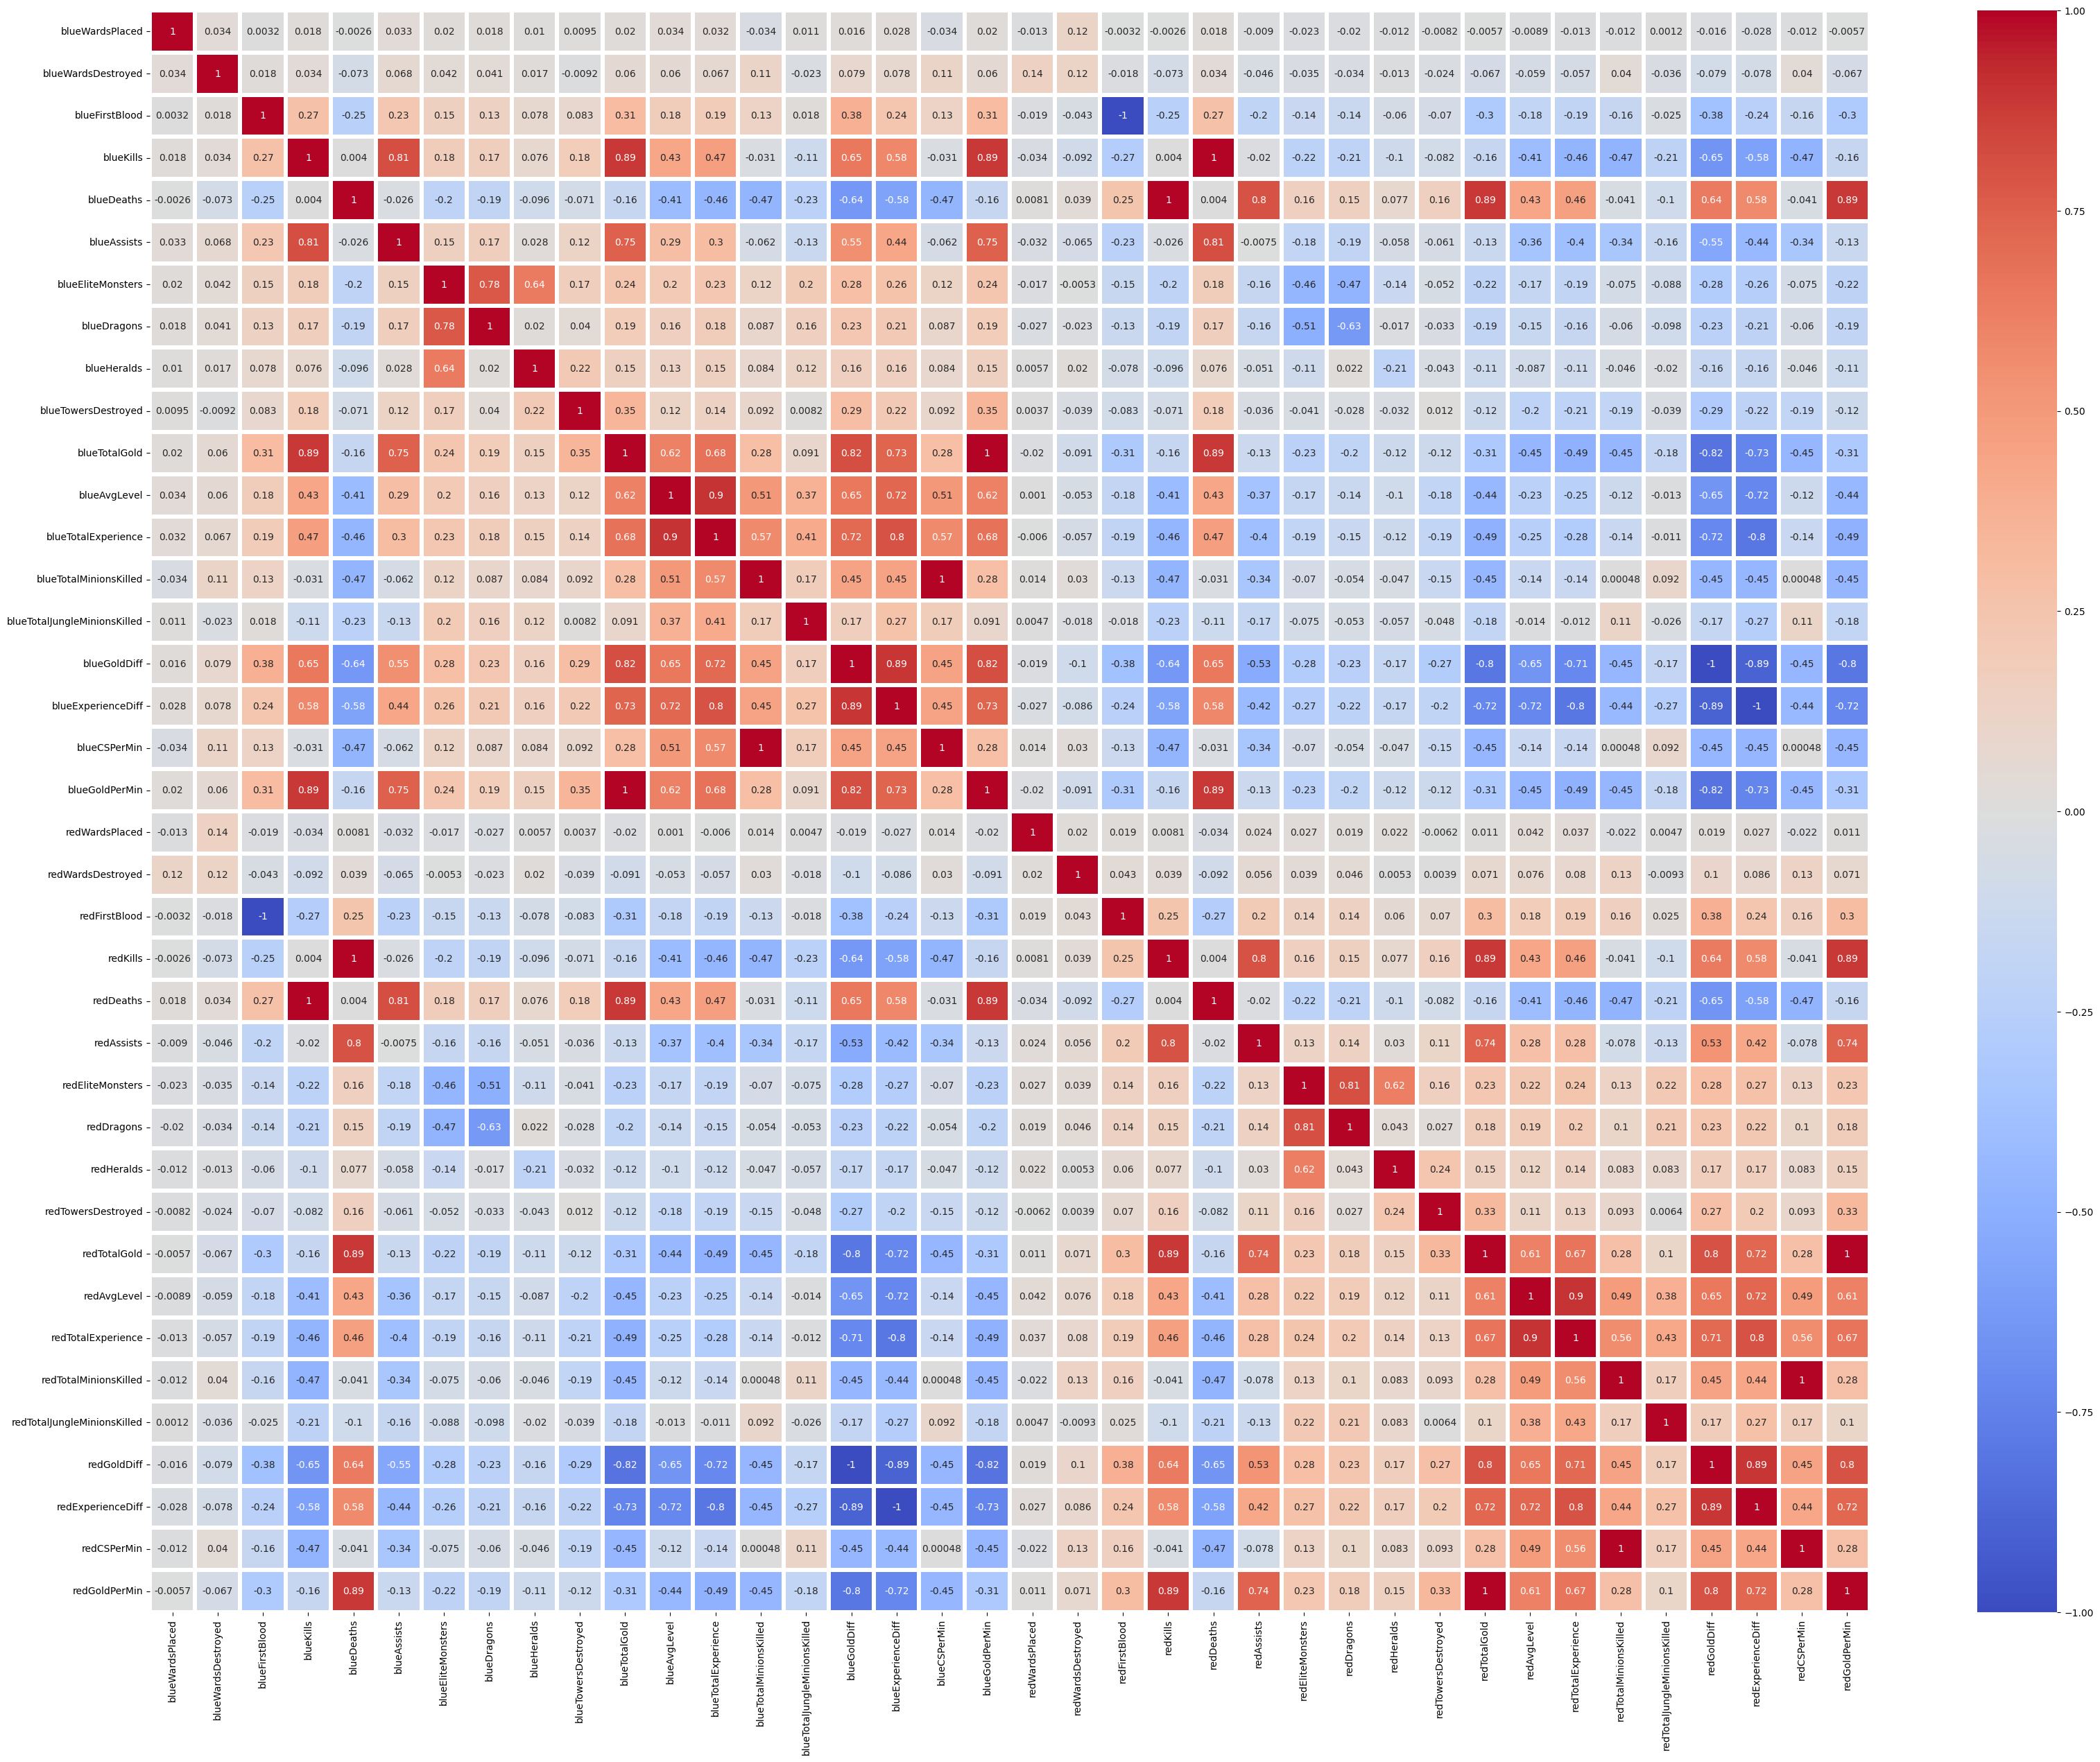

In [7]:
plt.figure(figsize=(40, 30))
sns.heatmap(corr_mat,annot=True, cmap='coolwarm', linewidths=4)

In [8]:
data0.drop(['redFirstBlood','redKills','redDeaths','redGoldDiff','redExperienceDiff'],axis=1,inplace=True) #redundant columns (blueFirsBlood,BlueDeaths,BlueKills,blueGoldDiff,redExperienceDiff)
data0.drop(['blueTotalMinionsKilled','redTotalMinionsKilled','blueTotalGold','redTotalGold'],axis=1,inplace=True)


In [9]:
data0.head(5)

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalExperience,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,6.6,17039,36,643,-8,19.5,1721.0,15,6,8,0,0,0,0,6.8,17047,55,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,6.6,16265,43,-2908,-1173,17.4,1471.2,12,1,2,2,1,1,1,6.8,17438,52,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,6.4,16221,46,-1172,-1033,18.6,1611.3,15,3,14,0,0,0,0,6.8,17254,28,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,7.0,17954,55,-1321,-7,20.1,1515.7,15,2,10,0,0,0,0,7.0,17961,47,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,7.0,18543,57,-1004,230,21.0,1640.0,17,2,7,1,1,0,0,7.0,18313,67,22.5,1740.4


In [10]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWardsPlaced               9879 non-null   int64  
 1   blueWardsDestroyed            9879 non-null   int64  
 2   blueFirstBlood                9879 non-null   int64  
 3   blueKills                     9879 non-null   int64  
 4   blueDeaths                    9879 non-null   int64  
 5   blueAssists                   9879 non-null   int64  
 6   blueEliteMonsters             9879 non-null   int64  
 7   blueDragons                   9879 non-null   int64  
 8   blueHeralds                   9879 non-null   int64  
 9   blueTowersDestroyed           9879 non-null   int64  
 10  blueAvgLevel                  9879 non-null   float64
 11  blueTotalExperience           9879 non-null   int64  
 12  blueTotalJungleMinionsKilled  9879 non-null   int64  
 13  blu

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
data1=pd.DataFrame(scaler.fit_transform(data0),columns=data0.columns)
data1.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalExperience,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,-1.035635,-0.740639,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,0.329496,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.763215,0.367685,-0.928741,0.052293
1,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,-1.035635,-1.385391,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,-1.148188,2.277700,1.191944,2.290977,4.412301,-0.410475,-0.436980,0.068504,1.033784,0.758619
2,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,-0.210439,-1.691092,-1.422043,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,1.807181,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.590502,-2.324944,-0.654900,0.533909
3,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,-0.210439,0.275280,0.021567,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,0.822058,-0.914893,-0.838966,-0.436495,-0.198353,0.244627,-0.000609,-0.430131,0.805583,-0.007406
4,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,0.275280,0.512211,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.083215,0.681403,1.191944,-0.436495,-0.198353,0.244627,0.293085,1.564408,0.349182,0.613731


In [13]:
data1.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalExperience,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
count,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03
mean,-2.876982e-17,5.034719e-18,-1.078868e-18,1.125619e-16,-1.179563e-16,-1.111234e-16,3.308530e-17,-8.702872e-17,-5.753965e-18,-2.733133e-17,1.362251e-15,8.199400e-16,-1.706410e-16,1.258680e-17,-1.438491e-18,-4.919640e-16,-8.271324e-16,-1.941963e-17,8.055551e-17,8.055551e-17,-8.918646e-17,-3.991813e-17,2.445435e-17,2.589284e-17,1.444245e-15,3.394839e-16,8.055551e-17,-1.352901e-15,-6.883180e-16
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-9.594869e-01,-1.298863e+00,-1.009663e+00,-2.053863e+00,-2.092146e+00,-1.634988e+00,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,-7.590210e+00,-6.522575e+00,-5.103130e+00,-4.420473e+00,-4.842738e+00,-5.796662e+00,-3.760305e+00,-8.868398e-01,-1.273543e+00,-1.640750e+00,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,-6.961495e+00,-6.254973e+00,-4.718391e+00,-5.036349e+00,-3.539707e+00
25%,-4.599937e-01,-8.390689e-01,-1.009663e+00,-7.253456e-01,-7.286663e-01,-6.508123e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,-3.801773e-01,-6.331808e-01,-6.576895e-01,-6.521677e-01,-6.545317e-01,-6.725233e-01,-7.085955e-01,-4.533880e-01,-8.058701e-01,-6.556268e-01,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,-4.104749e-01,-6.276311e-01,-7.293122e-01,-6.549000e-01,-7.120554e-01
50%,-3.489952e-01,8.051859e-02,9.904294e-01,-6.108705e-02,-4.692613e-02,-1.587244e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,2.752802e-01,1.906753e-02,-5.149305e-02,-1.688026e-04,2.926826e-03,5.949653e-02,-6.868415e-02,-3.450250e-01,-3.381975e-01,-1.630653e-01,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,2.446271e-01,1.023723e-02,-3.122336e-02,2.970140e-02,-7.448379e-02
75%,-1.269983e-01,5.403123e-01,9.904294e-01,6.031716e-01,6.348140e-01,5.794075e-01,7.195032e-01,1.327623e+00,-4.811324e-01,-2.104390e-01,9.307377e-01,6.629858e-01,5.547034e-01,6.446966e-01,6.486683e-01,7.000139e-01,6.223550e-01,-1.282991e-01,5.971477e-01,5.757769e-01,6.814033e-01,1.191944e+00,-4.364949e-01,-1.983529e-01,8.997291e-01,6.697989e-01,5.671385e-01,7.143028e-01,6.234576e-01
max,1.263783e+01,1.111557e+01,9.904294e-01,5.252982e+00,5.406995e+00,5.500287e+00,2.318237e+00,1.327623e+00,2.078430e+00,1.615907e+01,3.552568e+00,3.578528e+00,4.191882e+00,4.668380e+00,4.364806e+00,3.033327e+00,4.687827e+00,1.374216e+01,9.950600e+00,5.255111e+00,2.277700e+00,1.191944e+00,2.290977e+00,9.022956e+00,4.175239e+00,3.593814e+00,4.057583e+00,3.270148e+00,4.187620e+00


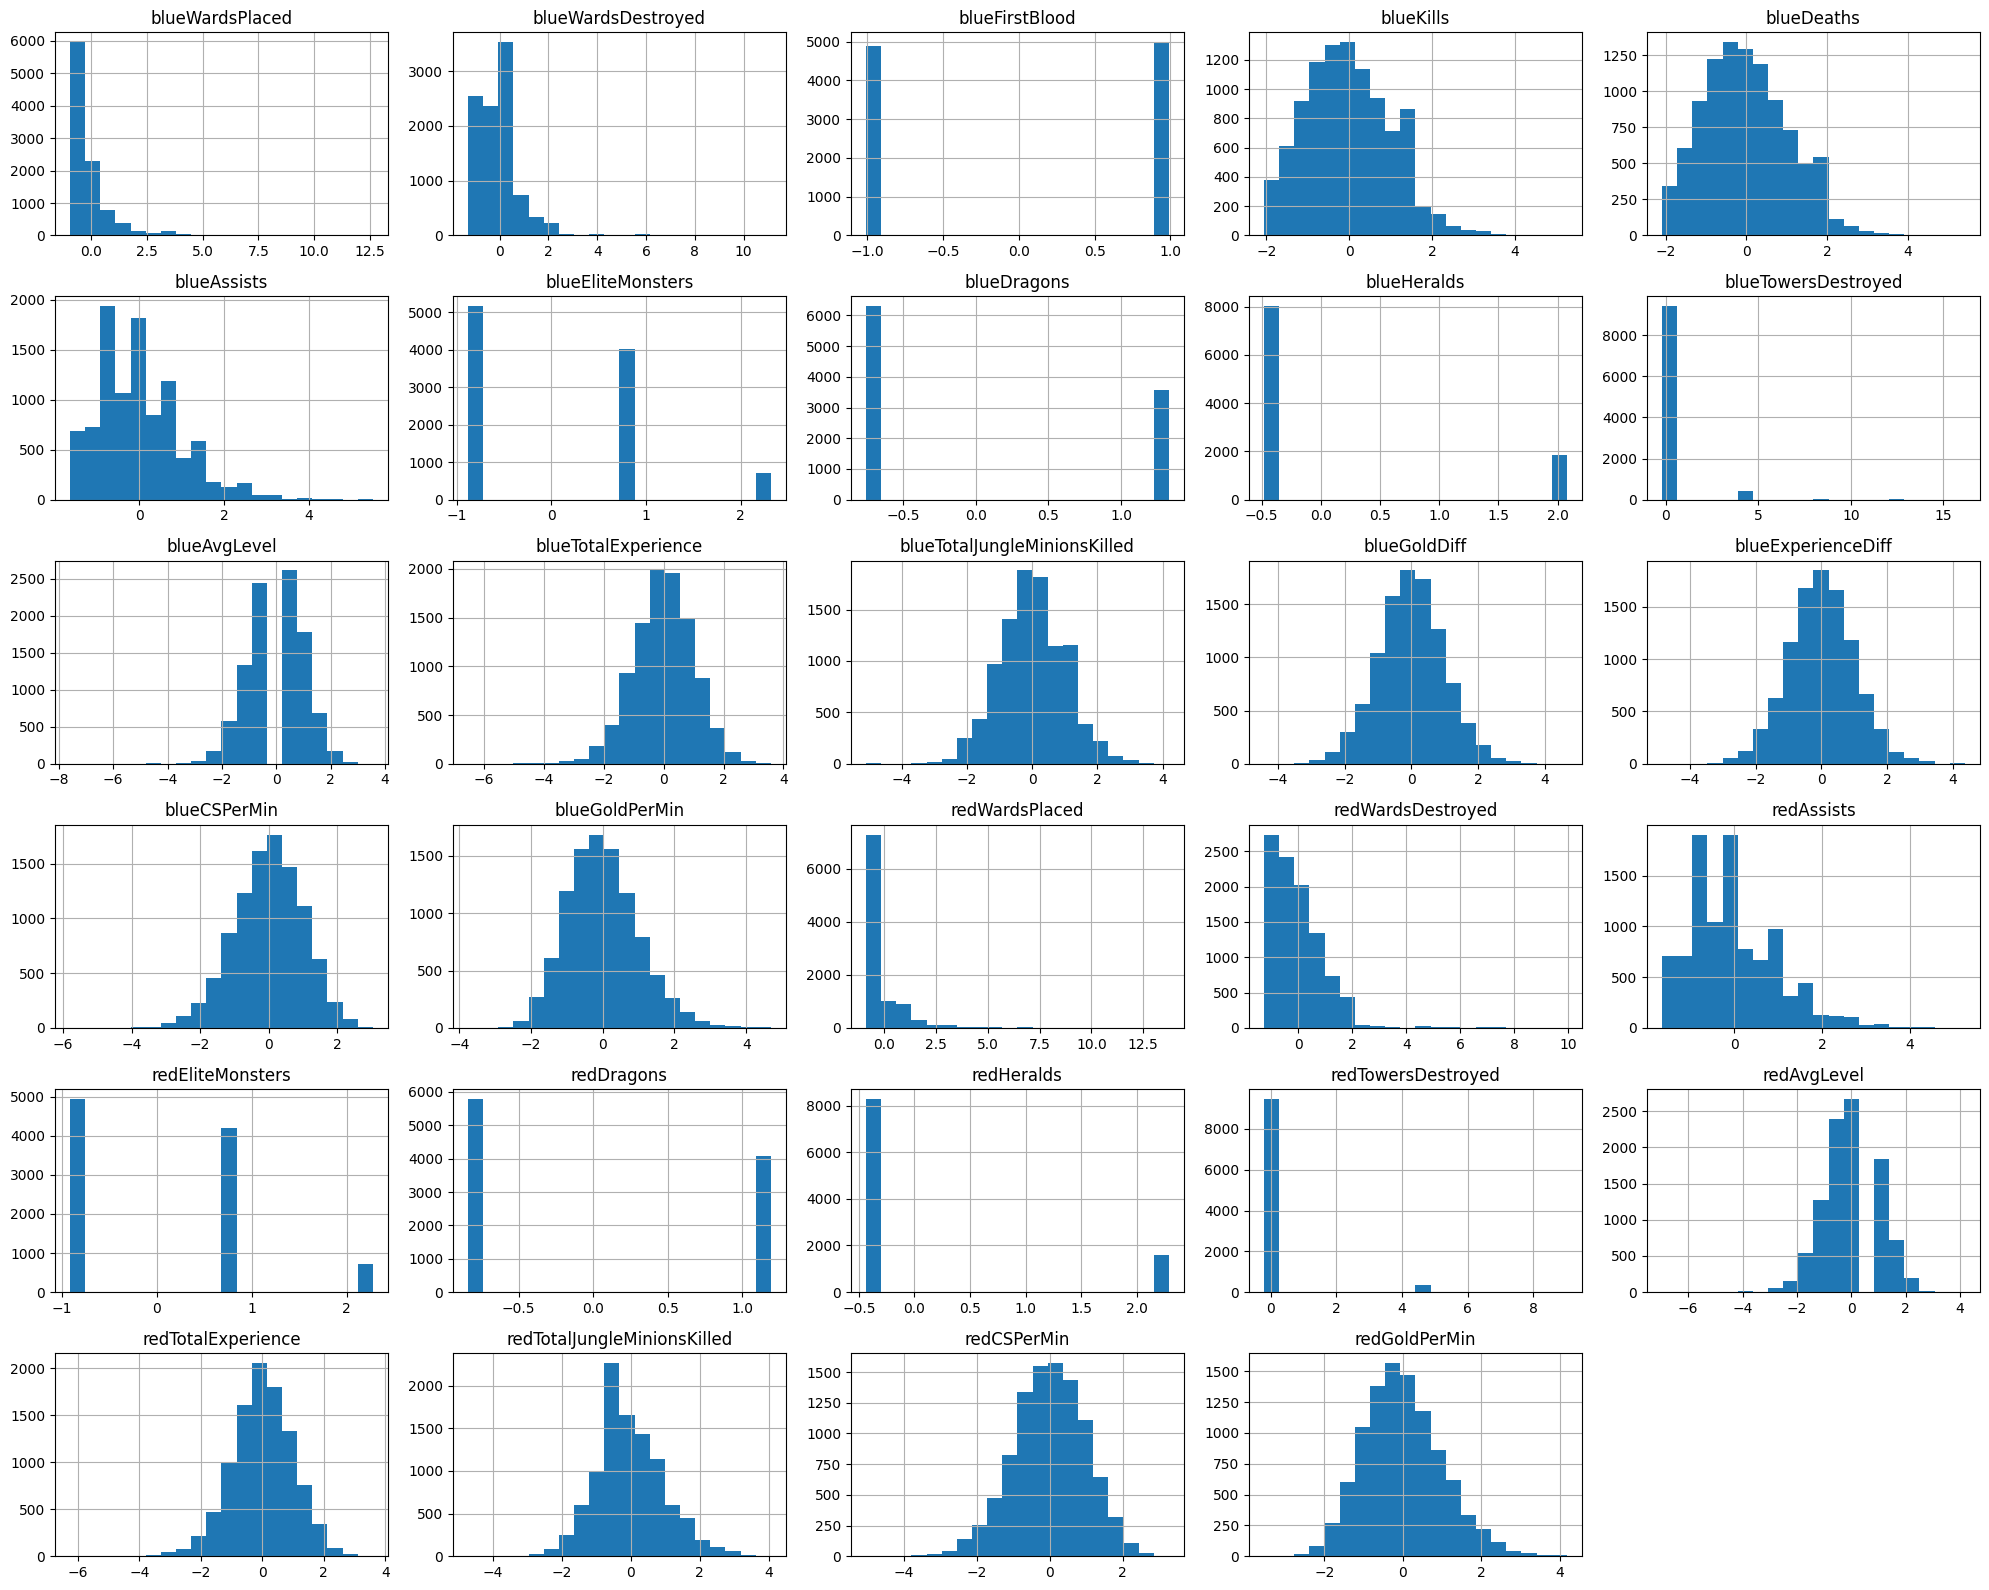

In [14]:
data1.hist(figsize=(20, 16), bins=20)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.2, random_state=42)

In [16]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (7903, 29)
X_test: (1976, 29)
y_train: (7903,)
y_test: (1976,)


In [25]:
from pycaret.classification import setup,compare_models,tune_model,evaluate_model

In [23]:
s=setup(data=pd.concat([X_train,y_train], axis=1),target='blueWins',preprocess=False)

,Description,Value
0,Session id,224
1,Target,blueWins
2,Target type,Binary
3,Original data shape,"(7903, 30)"
4,Transformed data shape,"(7903, 30)"
5,Transformed train set shape,"(5532, 30)"
6,Transformed test set shape,"(2371, 30)"
7,Numeric features,29


In [24]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7285,0.8029,0.7173,0.7326,0.7246,0.4569,0.4573,1.0350
lr,Logistic Regression,0.7278,0.8069,0.7257,0.7274,0.7264,0.4555,0.4557,1.5050
ada,Ada Boost Classifier,0.7252,0.7975,0.7159,0.7283,0.7219,0.4504,0.4507,0.3390
rf,Random Forest Classifier,0.7245,0.7933,0.7021,0.7341,0.7175,0.4489,0.4496,0.6390
ridge,Ridge Classifier,0.7234,0.8066,0.7199,0.7237,0.7217,0.4468,0.4470,0.0300
lda,Linear Discriminant Analysis,0.7234,0.8066,0.7199,0.7237,0.7217,0.4468,0.4470,0.0280
nb,Naive Bayes,0.7227,0.7956,0.7097,0.7275,0.7182,0.4454,0.4459,0.0220
et,Extra Trees Classifier,0.7167,0.7931,0.7028,0.7220,0.7120,0.4334,0.4340,0.3790
lightgbm,Light Gradient Boosting Machine,0.7128,0.7913,0.6999,0.7172,0.7082,0.4255,0.4259,0.3510
svm,SVM - Linear Kernel,0.6969,0.7683,0.6869,0.7005,0.6931,0.3937,0.3944,0.0420


c:\Users\El BAR\Documents\ds_projects\env\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [ ]:
tuned_best = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:12:00
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Fitting 10 folds for each of 10 candidates, totalling 100 fits
